In [11]:
import requests as req
import pandas as pd
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [12]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [13]:
resp = req.get(target_url)
if resp.status_code == req.codes.ok:
    data = resp.text
    
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [14]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n' 

data = data.split(split_tag)

print(len(data))

data

9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'n00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'n00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'n00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'n00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg',
 'n00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'n00015388_514\thttp://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'n00015388_671\thttp://farm4.static.flickr.com/3217/294261

In [15]:
arrange_data = [n.split('\t') for n in data]
df = pd.DataFrame(arrange_data)
print(df)


                   0                                                  1
0      n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1      n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2      n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3      n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4      n00015388_355  http://img100.imageshack.us/img100/3253/forres...
5      n00015388_373  http://img172.imageshack.us/img172/4606/napo03...
6      n00015388_379  http://fotootjesvanannelies.web-log.nl/olifant...
7      n00015388_388  http://www.deweekkrant.nl/images/library/pictu...
8      n00015388_442  http://www.porschemania.it/discus/messages/815...
9      n00015388_474  http://farm1.static.flickr.com/72/225029238_80...
10     n00015388_514  http://farm2.static.flickr.com/1128/1432436038...
11     n00015388_671  http://farm4.static.flickr.com/3217/2942611930...
12     n00015388_686  http://farm1.static.flickr.com/29/54608382

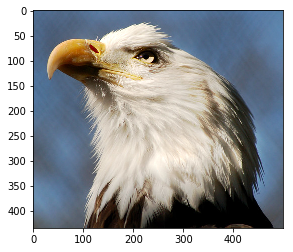

In [16]:
# 請用 df.loc[...] 得到第一筆資料的連結
#.loc先行後列，中間用逗號（,）分割
first_link = df.loc[0, 1]

resp = req.get(first_link)
img = Image.open(BytesIO(resp.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()


In [19]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for img_scan in url_list:      
        
        try:
            #if resp.status_code == req.codes.ok:
            resp = req.get(img_scan)
            if resize:
                img_list.append(Image.open(BytesIO(resp.content)).resize((800, 600))) 
            else:
                img_list.append(Image.open(BytesIO(resp.content))) 
                
        except:
            print("Get image failed from :", img_scan)

            
    return img_list

Get image failed from : http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


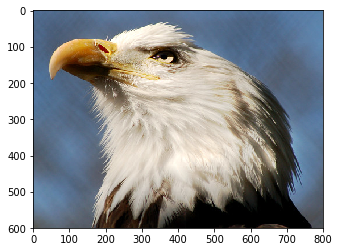

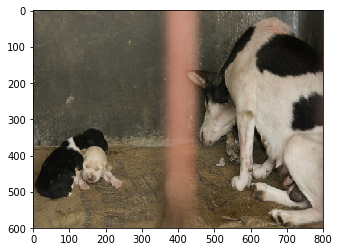

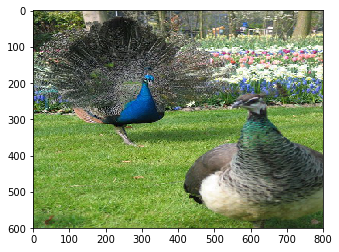

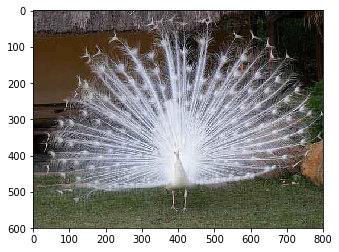

In [20]:
result = img2arr_fromURLs(df[0:5][1].values, True)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()